### Bank_Loans Personal Project

##### For this project I will use pandas to be able to manipulate the dataset, matplotlib, plotly.express, and seaborn to plot results and use data visualization, and I used numpy for mathematical operations. 

In [1]:
import pandas as pd
# from summarytools import dfSummary
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

#### Load dataset from Kaggle

In [2]:
loans=pd.read_csv("C:/Users/felip/Downloads/loan_sanction_test.csv")
loans

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [4]:
loans.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [5]:
loan3 = loans['Married'].fillna('NA')
loan3.head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: Married, dtype: object

##### After starting to replace null values, I realized that you can't replace all of them since adding '0' represented something in the column and adding NA will provide a wrong answer.

In [6]:
loan = loans.dropna()
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [7]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [8]:
loan.agg(["kurtosis"])

C:\Users\felip\AppData\Local\Temp\ipykernel_4228\3311349312.py:1: FutureWarning: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  loan.agg(["kurtosis"])


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
kurtosis,141.612034,32.96701,5.739804,8.62994,1.518748


## Visualization of Loan Amount

##### LoanAmount

##### After the data has been cleaned, we can start using data visualization to be able to see the difference between the amount of people that have different LoanAmount. 

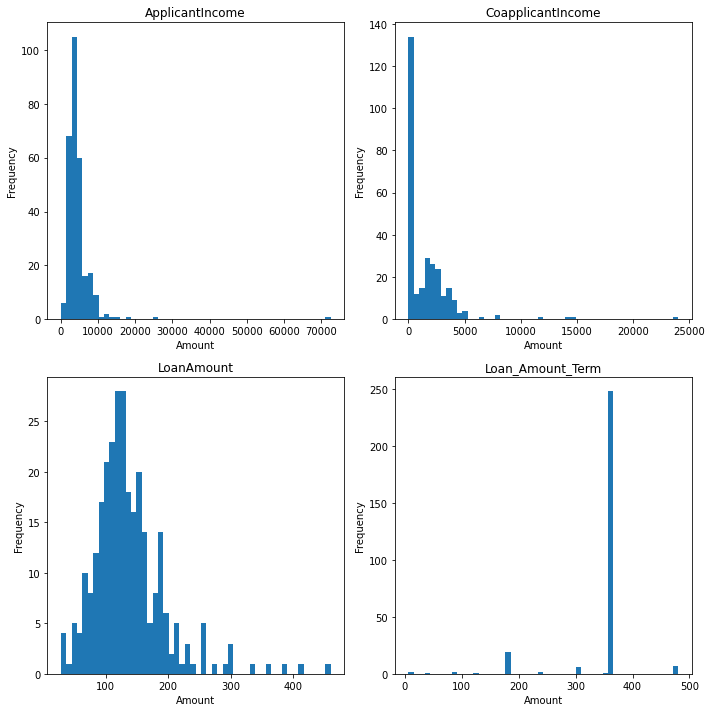

In [9]:
columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

# Create a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Plot each histogram in a separate subplot
for i, col in enumerate(columns):
    axs[i].hist(loan[col], bins=50)
    axs[i].set_title(col)
    axs[i].set_xlabel('Amount')
    axs[i].set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'outliers detected'}>

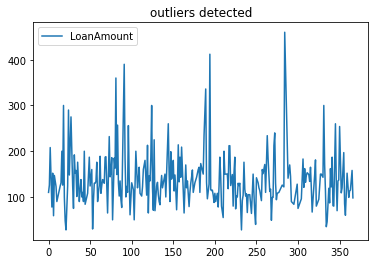

In [10]:
%matplotlib inline
loan[["LoanAmount"]].plot(title = 'outliers detected')

##### What about the long term?

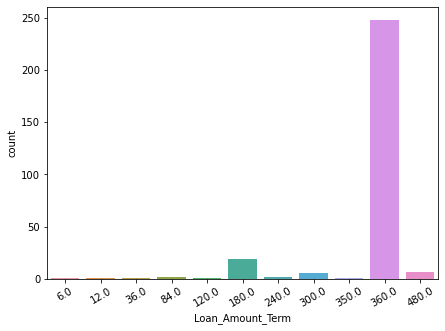

In [11]:
plt.figure(figsize=(7,5))
ax = sns.countplot(data=loan, x='Loan_Amount_Term')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

##### The reasoning from the graphics is mostly to be able see the outliers of the loan amounts and the loan period of time that is the most given. It can be seen that the most 75 to 200 for an amount, and the distribution can be said that is normally distributed if the outliers are removed. 

### Anova Test

In [12]:
import pandas as pd
import seaborn as sns ##for data visualization

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('LoanAmount ~ C(ApplicantIncome)', data=loan).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(ApplicantIncome),939636.126586,250.0,1.645305,0.033134
Residual,86807.416667,38.0,NaN,NaN


##### In this model it can be seen that applicant income is a variable that influence on Loan Amount, let's see if there are more variables that influence as well by applying two way anova tests 

In [14]:
import statsmodels.formula.api as smf # by importing smf we can do a different type of regression analyzing that was not included in sm

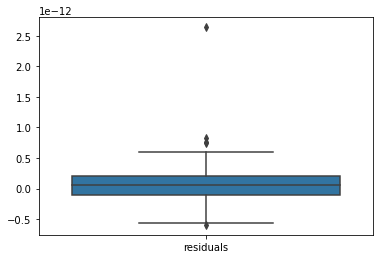

In [15]:
model = smf.ols('LoanAmount ~ C(Married) + C(Education) + C(ApplicantIncome)+ C(Gender) + C(Dependents) + C(Self_Employed) + C(CoapplicantIncome) + C(Credit_History)+ C(Property_Area)', data=loan).fit()

# Create a dataframe of the residuals
residuals = pd.DataFrame({'residuals': model.resid})

# Create a box plot
sns.boxplot(data=residuals)

# Show the plot
plt.show()

##### According to the results, all of the variables are relevant to the loan amount that is given, which can be said to be true with the p-value, but there is not much variance from the results so we will have to keep analyzing the data. Let's try to eliminate some values 

##### Let's try to change the strings into binomial values of 1 and 0 for a more accurate analysis.   

In [16]:
# Load data into a Pandas DataFrame
df = pd.read_csv('C:/Users/felip/Downloads/loan_sanction_test.csv')

## We drop the null values
ndf = df.dropna()

# Convert columns to string type
ndf[['Married', 'Education']] = ndf[['Married', 'Education']].astype(str)

C:\Users\felip\AppData\Local\Temp\ipykernel_4228\3732745331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[['Married', 'Education']] = ndf[['Married', 'Education']].astype(str)


##### After dropping and converting the values into strings, we can replace some variables with 1 and 0

In [17]:
for col in ['Gender', 'Married', 'Education', 'Self_Employed']:
    ndf[col] = ndf[col].apply(lambda x: 1 if x in ['Male', 'Yes', 'Graduate', 'Yes'] else 0)

print(ndf)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0    LP001015       1        1          0          1              0   
1    LP001022       1        1          1          1              0   
2    LP001031       1        1          2          1              0   
4    LP001051       1        0          0          0              0   
5    LP001054       1        1          0          0              1   
..        ...     ...      ...        ...        ...            ...   
361  LP002969       1        1          1          1              0   
362  LP002971       1        1         3+          0              1   
363  LP002975       1        1          0          1              0   
365  LP002986       1        1          0          1              0   
366  LP002989       1        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

C:\Users\felip\AppData\Local\Temp\ipykernel_4228\2494126675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[col] = ndf[col].apply(lambda x: 1 if x in ['Male', 'Yes', 'Graduate', 'Yes'] else 0)


##### We can't change Property area into 0 and 1, so we will have dummy variables that represent each one of them 

In [18]:
mapping = {'Urban': 0, 'Semiurban': 1, 'Rural': 2}

# Apply mapping using lambda function
ndf['Property_Area'] = ndf['Property_Area'].apply(lambda x: mapping[x])

print(ndf)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0    LP001015       1        1          0          1              0   
1    LP001022       1        1          1          1              0   
2    LP001031       1        1          2          1              0   
4    LP001051       1        0          0          0              0   
5    LP001054       1        1          0          0              1   
..        ...     ...      ...        ...        ...            ...   
361  LP002969       1        1          1          1              0   
362  LP002971       1        1         3+          0              1   
363  LP002975       1        1          0          1              0   
365  LP002986       1        1          0          1              0   
366  LP002989       1        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

C:\Users\felip\AppData\Local\Temp\ipykernel_4228\1090825321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Property_Area'] = ndf['Property_Area'].apply(lambda x: mapping[x])


In [19]:
# Replace '+3' with '3' using the .replace() method to be able to apply regression without the + sign
ndf['Dependents'] = ndf['Dependents'].replace('+3', '3')

print(ndf)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0    LP001015       1        1          0          1              0   
1    LP001022       1        1          1          1              0   
2    LP001031       1        1          2          1              0   
4    LP001051       1        0          0          0              0   
5    LP001054       1        1          0          0              1   
..        ...     ...      ...        ...        ...            ...   
361  LP002969       1        1          1          1              0   
362  LP002971       1        1         3+          0              1   
363  LP002975       1        1          0          1              0   
365  LP002986       1        1          0          1              0   
366  LP002989       1        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1

C:\Users\felip\AppData\Local\Temp\ipykernel_4228\3016366432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['Dependents'] = ndf['Dependents'].replace('+3', '3')


In [20]:
## after cleaning the data, let's see how it looks now
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    int64  
 2   Married            289 non-null    int64  
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    int64  
 5   Self_Employed      289 non-null    int64  
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 29.4+ KB


In [21]:
ndf.isnull().sum() # check for null values and we are good to go

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

##### Now that all the values can be used for regression analysis

In [22]:
model_lin2 = sm.OLS.from_formula("LoanAmount ~ Married + Education + ApplicantIncome + Gender + Dependents + Self_Employed + CoapplicantIncome + Credit_History+ Property_Area + Loan_Amount_Term", data=ndf)
result_lin2 = model_lin2.fit()
result_lin2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     11.08
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           4.88e-18
Time:                        20:34:32   Log-Likelihood:                -1534.6
No. Observations:                 289   AIC:                             3095.
Df Residuals:                     276   BIC:                             3143.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            45.5237     20.166      2.257      0.025       5.825      85.222
Dependents[T.1]       0.6728      8.982      0.075      0.940     -17.009      18.355
Dependents[T.2]      15.4961      8.624      1.797      0.073      -1.481      32.473
Dependents[T.3+]      7.3899     10.868      0.680      0.497     -14.005      28.785
Married              12.7660      7.089      1.801      0.073      -1.189      26.721
Education            19.0346      7.272      2.617      0.009       4.718      33.351
ApplicantIncome       0.0055      0.001      8.512      0.000       0.004       0.007
Gender               -1.3580      7.726     -0.176      0.861     -16.567      13.851
Self_Employed         2.8500      9.546      0.299      0.765     -15.941      21.641
CoapplicantIncome     0.0062      0.001      4.863      0.000       0.004       0.009
Credit_History       -7.6981      8.277     -0.930      0.353     -23.992       8.596
Property_Area         3.0168      3.609      0.836      0.404      -4.088      10.121
Loan_Amount_Term      0.1003      0.046      2.198      0.029       0.010       0.190
==============================================================================
Omnibus:                       64.078   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.503
Skew:                           0.936   Prob(JB):                     3.21e-46
Kurtosis:                       6.728   Cond. No.                     4.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Based on the model above, people that have education, higher income including the coapplicant, and a more extended Loan Amount Term tent to have a better loan amount. Now we can try a model between these variables to see the one that is the most influencial on when people ask for loans


In [23]:
model_lin3 = sm.OLS.from_formula("LoanAmount ~ Education + ApplicantIncome + CoapplicantIncome + Loan_Amount_Term", data=ndf)
result_lin3 = model_lin3.fit()
result_lin3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     29.72
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.17e-20
Time:                        20:34:32   Log-Likelihood:                -1540.9
No. Observations:                 289   AIC:                             3092.
Df Residuals:                     284   BIC:                             3110.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            53.5218     17.139      3.123      0.002      19.787      87.257
Education            16.4967      7.193      2.293      0.023       2.338      30.656
ApplicantIncome       0.0056      0.001      8.925      0.000       0.004       0.007
CoapplicantIncome     0.0066      0.001      5.230      0.000       0.004       0.009
Loan_Amount_Term      0.1004      0.045      2.213      0.028       0.011       0.190
==============================================================================
Omnibus:                       68.062   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.719
Skew:                           0.995   Prob(JB):                     2.63e-49
Kurtosis:                       6.823   Cond. No.                     3.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Now the we can see the p-values are still significant, but the one value that remained significant among both models was Income. 

##### In conclusion, it can be said that for a person to have a better loan they will need to show Education, a high income, if they have an coapplicant then that person needs a high income as well, and they will need to have a good loan amoun term to be able to pay back the loan. 

##### The most significant value to show for a better loan is to have a good income, it has the strongest relationship with Loan amount based on their p-value, and if they have an coapplicant, that person needs a good income as well